# **Early Diagnosis of Parkinson's Disease via keystrokes**

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.core.display import display, HTML

df.csv and nqdf.csv are the final processed data in columns and rows ready for analysis.<br>
df.csv is for Tappy data set and nq is for neuroQWERTY data set.

In [203]:
tp = pd.read_csv('dfData/df.csv')
nq = pd.read_csv('dfData/nqdf.csv')
tp.head()
nq.head()

,Birth,DA,DiagnosisYr,Gender,Impact,Levadopa,MAOB,OtherMed,Parkinson,Sidedness,...,HTbin4,HTbin5,HTbin6,HTbin7,HTbin8,HTbin9,HTVar,FTVar,HTmean,FTmean
0,1937,False,2015,Female,Severe,True,False,True,True,Right,...,0.00000,0.0,0.0,0.0,0.0,0.0,1159.336994,22251.264781,124.658260,418.255523
1,1940,False,------,Female,------,False,False,False,False,None,...,0.00000,0.0,0.0,0.0,0.0,0.0,516.962542,4191.480253,98.701331,124.694140
2,1937,False,2015,Female,Mild,False,False,True,True,Right,...,0.01227,0.0,0.0,0.0,0.0,0.0,2888.547405,16863.756301,175.307975,346.656442
3,1943,True,2009,Female,Mild,False,False,True,True,Right,...,0.00000,0.0,0.0,0.0,0.0,0.0,880.261337,18173.314440,125.230868,280.499562
4,1953,True,2012,Male,Medium,True,True,False,True,Left,...,0.00000,0.0,0.0,0.0,0.0,0.0,177.360998,7682.957938,70.229277,153.107970


,FTbin1,FTbin10,FTbin2,FTbin3,FTbin4,FTbin5,FTbin6,FTbin7,FTbin8,FTbin9,...,HTbin6,HTbin7,HTbin8,HTbin9,UserKey,HTVar,FTVar,HTmean,FTmean,Parkinson
0,0.727823,0.000000,0.225849,0.046328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,76,1161.788344,3275.284760,122.496815,76.366860,0.0
1,0.299453,0.000000,0.395624,0.170465,0.065178,0.029626,0.030082,0.009572,0.000000,0.000000,...,0.0,0.0,0.0,0.0,84,626.996339,16552.446605,74.630264,174.673974,1.0
2,0.085486,0.009864,0.287459,0.205730,0.167684,0.099577,0.067168,0.031470,0.025834,0.019728,...,0.0,0.0,0.0,0.0,79,1070.860539,38073.472187,106.890982,304.552043,0.0
3,0.029189,0.112973,0.122162,0.207568,0.188108,0.128108,0.080000,0.049189,0.049730,0.032973,...,0.0,0.0,0.0,0.0,80,1869.010738,96908.776906,160.566270,467.000432,1.0
4,0.086847,0.165161,0.196787,0.149096,0.086345,0.076305,0.083333,0.055723,0.052711,0.047691,...,0.0,0.0,0.0,0.0,72,4215.091124,143183.922577,169.471637,490.094528,1.0


Many columns in Tappy data set do not have a matching data in neuroQWERTY data set. They are generally user's information and thus discarded.

In [204]:
fltbin = ['FTbin1', 'FTbin2', 'FTbin3', 'FTbin4', 'FTbin5', 'FTbin6', 'FTbin7', 'FTbin8', 'FTbin9', 'FTbin10']
holdbin = ['HTbin1', 'HTbin2', 'HTbin3', 'HTbin4', 'HTbin5', 'HTbin6', 'HTbin7', 'HTbin8', 'HTbin9', 'HTbin10']
st = ['Parkinson','UserKey','HTVar', 'FTVar', 'HTmean', 'FTmean']  

tpdf = tp[st + fltbin + holdbin ]
nqdf = nq[st + fltbin + holdbin ]

In [205]:
tpdf.head()
nqdf.head()

,Parkinson,UserKey,HTVar,FTVar,HTmean,FTmean,FTbin1,FTbin2,FTbin3,FTbin4,...,HTbin1,HTbin2,HTbin3,HTbin4,HTbin5,HTbin6,HTbin7,HTbin8,HTbin9,HTbin10
0,True,ZCPALNB4ZM,1159.336994,22251.264781,124.658260,418.255523,0.012708,0.076246,0.143695,0.190616,...,0.234604,0.740958,0.024438,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,False,IDYIDJBAXF,516.962542,4191.480253,98.701331,124.694140,0.384938,0.485074,0.122017,0.007970,...,0.557256,0.442744,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,True,RYQGAPGNAM,2888.547405,16863.756301,175.307975,346.656442,0.000000,0.092025,0.319018,0.269939,...,0.067485,0.619632,0.300613,0.01227,0.0,0.0,0.0,0.0,0.0,0.0
3,True,5PQVTWULAC,880.261337,18173.314440,125.230868,280.499562,0.051140,0.268141,0.306381,0.181755,...,0.148353,0.845658,0.005989,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,True,4GUYFBZMK9,177.360998,7682.957938,70.229277,153.107970,0.290648,0.477152,0.159405,0.051010,...,1.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


,Parkinson,UserKey,HTVar,FTVar,HTmean,FTmean,FTbin1,FTbin2,FTbin3,FTbin4,...,HTbin1,HTbin2,HTbin3,HTbin4,HTbin5,HTbin6,HTbin7,HTbin8,HTbin9,HTbin10
0,0.0,76,1161.788344,3275.284760,122.496815,76.366860,0.727823,0.225849,0.046328,0.000000,...,0.294025,0.685444,0.020532,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,84,626.996339,16552.446605,74.630264,174.673974,0.299453,0.395624,0.170465,0.065178,...,0.788514,0.211486,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,79,1070.860539,38073.472187,106.890982,304.552043,0.085486,0.287459,0.205730,0.167684,...,0.544857,0.455143,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,80,1869.010738,96908.776906,160.566270,467.000432,0.029189,0.122162,0.207568,0.188108,...,0.054595,0.755135,0.190270,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,72,4215.091124,143183.922577,169.471637,490.094528,0.086847,0.196787,0.149096,0.086345,...,0.103916,0.620984,0.226908,0.048193,0.0,0.0,0.0,0.0,0.0,0.0


# Checking for null and invalid data

In [206]:
# tpdf.isnull().sum() # this will check for null and FTVar and HTVar were identified to contain null.
# tpdf[tpdf.HTVar.isnull()]

In [207]:
# remove 'XQIXWF0BXG' as user only has 1 record
dropXQ = tpdf.UserKey != 'XQIXWF0BXG'
tpdf = tpdf[dropXQ]
# tpdf.iloc[199:203, :] # Verified

In [208]:
tpdf[tpdf.FTVar ==0]
tpdf[tpdf.HTVar ==0]

,Parkinson,UserKey,HTVar,FTVar,HTmean,FTmean,FTbin1,FTbin2,FTbin3,FTbin4,...,HTbin1,HTbin2,HTbin3,HTbin4,HTbin5,HTbin6,HTbin7,HTbin8,HTbin9,HTbin10
96,True,M0PBVLISCF,276.125,0.0,35.15,23.4,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Parkinson,UserKey,HTVar,FTVar,HTmean,FTmean,FTbin1,FTbin2,FTbin3,FTbin4,...,HTbin1,HTbin2,HTbin3,HTbin4,HTbin5,HTbin6,HTbin7,HTbin8,HTbin9,HTbin10


In [209]:
# remove user 'M0PBVLISCF' since only has 2 records of keystroke data
dropM0 = tpdf.UserKey != 'M0PBVLISCF'
tpdf = tpdf[dropM0]
# tpdf.iloc[90:100, :] #Verified

Transform label 'Parkinson' column to use 0 and 1

In [210]:
# some preprocessing for Parkinson
from sklearn.preprocessing import LabelEncoder
LEncoder = LabelEncoder()
tpdf['Parkinson'] = LEncoder.fit_transform(tpdf['Parkinson'])
nqdf['Parkinson'] = LEncoder.fit_transform(nqdf['Parkinson'])

In [211]:
tpdf.head()
nqdf.head()

,Parkinson,UserKey,HTVar,FTVar,HTmean,FTmean,FTbin1,FTbin2,FTbin3,FTbin4,...,HTbin1,HTbin2,HTbin3,HTbin4,HTbin5,HTbin6,HTbin7,HTbin8,HTbin9,HTbin10
0,1,ZCPALNB4ZM,1159.336994,22251.264781,124.658260,418.255523,0.012708,0.076246,0.143695,0.190616,...,0.234604,0.740958,0.024438,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0,IDYIDJBAXF,516.962542,4191.480253,98.701331,124.694140,0.384938,0.485074,0.122017,0.007970,...,0.557256,0.442744,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,1,RYQGAPGNAM,2888.547405,16863.756301,175.307975,346.656442,0.000000,0.092025,0.319018,0.269939,...,0.067485,0.619632,0.300613,0.01227,0.0,0.0,0.0,0.0,0.0,0.0
3,1,5PQVTWULAC,880.261337,18173.314440,125.230868,280.499562,0.051140,0.268141,0.306381,0.181755,...,0.148353,0.845658,0.005989,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4GUYFBZMK9,177.360998,7682.957938,70.229277,153.107970,0.290648,0.477152,0.159405,0.051010,...,1.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


,Parkinson,UserKey,HTVar,FTVar,HTmean,FTmean,FTbin1,FTbin2,FTbin3,FTbin4,...,HTbin1,HTbin2,HTbin3,HTbin4,HTbin5,HTbin6,HTbin7,HTbin8,HTbin9,HTbin10
0,0,76,1161.788344,3275.284760,122.496815,76.366860,0.727823,0.225849,0.046328,0.000000,...,0.294025,0.685444,0.020532,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,84,626.996339,16552.446605,74.630264,174.673974,0.299453,0.395624,0.170465,0.065178,...,0.788514,0.211486,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0,79,1070.860539,38073.472187,106.890982,304.552043,0.085486,0.287459,0.205730,0.167684,...,0.544857,0.455143,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,1,80,1869.010738,96908.776906,160.566270,467.000432,0.029189,0.122162,0.207568,0.188108,...,0.054595,0.755135,0.190270,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,1,72,4215.091124,143183.922577,169.471637,490.094528,0.086847,0.196787,0.149096,0.086345,...,0.103916,0.620984,0.226908,0.048193,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
# nqdf[nqdf.FTVar ==0]

In [213]:
# concatenat 2 dfs
df = pd.concat([tpdf, nqdf])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 84
Data columns (total 26 columns):
Parkinson    300 non-null int64
UserKey      300 non-null object
HTVar        300 non-null float64
FTVar        300 non-null float64
HTmean       300 non-null float64
FTmean       300 non-null float64
FTbin1       300 non-null float64
FTbin2       300 non-null float64
FTbin3       300 non-null float64
FTbin4       300 non-null float64
FTbin5       300 non-null float64
FTbin6       300 non-null float64
FTbin7       300 non-null float64
FTbin8       300 non-null float64
FTbin9       300 non-null float64
FTbin10      300 non-null float64
HTbin1       300 non-null float64
HTbin2       300 non-null float64
HTbin3       300 non-null float64
HTbin4       300 non-null float64
HTbin5       300 non-null float64
HTbin6       300 non-null float64
HTbin7       300 non-null float64
HTbin8       300 non-null float64
HTbin9       300 non-null float64
HTbin10      300 non-null float64
dtypes: float64

In [214]:
df['Parkinson'].value_counts()

1    203
0     97
Name: Parkinson, dtype: int64

In [215]:
# reset index
df.reset_index(drop=True);

# save a copy
df.to_csv('dfData/withUserCleanDF.csv')
del df['UserKey'];
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 84
Data columns (total 25 columns):
Parkinson    300 non-null int64
HTVar        300 non-null float64
FTVar        300 non-null float64
HTmean       300 non-null float64
FTmean       300 non-null float64
FTbin1       300 non-null float64
FTbin2       300 non-null float64
FTbin3       300 non-null float64
FTbin4       300 non-null float64
FTbin5       300 non-null float64
FTbin6       300 non-null float64
FTbin7       300 non-null float64
FTbin8       300 non-null float64
FTbin9       300 non-null float64
FTbin10      300 non-null float64
HTbin1       300 non-null float64
HTbin2       300 non-null float64
HTbin3       300 non-null float64
HTbin4       300 non-null float64
HTbin5       300 non-null float64
HTbin6       300 non-null float64
HTbin7       300 non-null float64
HTbin8       300 non-null float64
HTbin9       300 non-null float64
HTbin10      300 non-null float64
dtypes: float64(24), int64(1)
memory usage: 60.9

In [216]:
df['HTbin10'].unique() # all zeros, can be removed
df['HTbin9'].unique() # all zeros, can be removed
df['HTbin8'].unique() # all zeros, can be removed
df[df['HTbin7']!=0.] # only row 194 has 1 value, 0.00375% of all hold time is in ths bin, can be ignored. Can be removed

array([ 0.])

array([ 0.])

array([ 0.])

,Parkinson,HTVar,FTVar,HTmean,FTmean,FTbin1,FTbin2,FTbin3,FTbin4,FTbin5,...,HTbin1,HTbin2,HTbin3,HTbin4,HTbin5,HTbin6,HTbin7,HTbin8,HTbin9,HTbin10
194,1,16191.9876,11287.225381,168.093774,176.518917,0.227083,0.456304,0.171858,0.094345,0.05041,...,0.373581,0.367957,0.096897,0.071931,0.070748,0.01571,0.003175,0.0,0.0,0.0


In [217]:
df = df.drop('HTbin10', axis=1)
df = df.drop('HTbin9', axis=1)
df = df.drop('HTbin8', axis=1)
df = df.drop('HTbin7', axis=1)

In [218]:
df.to_csv('dfData/cleandf.csv')

# Data set X and Label y created

In [219]:
X = df.drop('Parkinson', axis=1)
y = df['Parkinson']

## Create training set X_train, y_train and test set X_test, y_test

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [221]:
X_train.head()

,HTVar,FTVar,HTmean,FTmean,FTbin1,FTbin2,FTbin3,FTbin4,FTbin5,FTbin6,FTbin7,FTbin8,FTbin9,FTbin10,HTbin1,HTbin2,HTbin3,HTbin4,HTbin5,HTbin6
17,7034.653040,109321.071619,141.548025,441.003046,0.100904,0.207044,0.123751,0.108044,0.113755,0.085198,0.058068,0.049976,0.039981,0.113279,0.500714,0.229891,0.215612,0.052832,0.000952,0.0
59,505.331620,33525.986326,87.586677,347.397801,0.102726,0.144686,0.187565,0.179602,0.145115,0.128515,0.093966,0.017825,0.000000,0.000000,0.715100,0.284900,0.000000,0.000000,0.000000,0.0
6,1812.197253,8247.491304,126.456392,143.472325,0.378970,0.358401,0.198813,0.058946,0.004870,0.000000,0.000000,0.000000,0.000000,0.000000,0.221611,0.736402,0.041987,0.000000,0.000000,0.0
186,1866.608946,4238.140645,147.180645,234.125806,0.000000,0.290323,0.483871,0.225806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064516,0.806452,0.129032,0.000000,0.000000,0.0
174,643.646538,7447.736079,100.360056,217.316311,0.064875,0.432808,0.292864,0.202039,0.007414,0.000000,0.000000,0.000000,0.000000,0.000000,0.505097,0.494903,0.000000,0.000000,0.000000,0.0


# Copies of dataset with Scaler treatment: X, X_traindl, X_testdl 

In [222]:
# deep copy
Xdl = X.copy(deep=True)

X_traindl = X_train.copy(deep=True)
X_testdl = X_test.copy(deep=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Xdl[['HTVar', 'FTVar', 'HTmean', 'FTmean']] = scaler.fit_transform(Xdl[['HTVar', 'FTVar', 'HTmean', 'FTmean']])

X_traindl[['HTVar', 'FTVar', 'HTmean', 'FTmean']] = scaler.fit_transform(X_traindl[['HTVar', 'FTVar', 'HTmean', 'FTmean']])
X_testdl[['HTVar', 'FTVar', 'HTmean', 'FTmean']] = scaler.fit_transform(X_testdl[['HTVar', 'FTVar', 'HTmean', 'FTmean']])

In [223]:
X_traindl.head()

,HTVar,FTVar,HTmean,FTmean,FTbin1,FTbin2,FTbin3,FTbin4,FTbin5,FTbin6,FTbin7,FTbin8,FTbin9,FTbin10,HTbin1,HTbin2,HTbin3,HTbin4,HTbin5,HTbin6
17,0.432401,0.024458,0.495007,0.167519,0.100904,0.207044,0.123751,0.108044,0.113755,0.085198,0.058068,0.049976,0.039981,0.113279,0.500714,0.229891,0.215612,0.052832,0.000952,0.0
59,0.027694,0.007192,0.197974,0.124868,0.102726,0.144686,0.187565,0.179602,0.145115,0.128515,0.093966,0.017825,0.000000,0.000000,0.715100,0.284900,0.000000,0.000000,0.000000,0.0
6,0.108698,0.001434,0.411934,0.031950,0.378970,0.358401,0.198813,0.058946,0.004870,0.000000,0.000000,0.000000,0.000000,0.000000,0.221611,0.736402,0.041987,0.000000,0.000000,0.0
186,0.112070,0.000521,0.526012,0.073256,0.000000,0.290323,0.483871,0.225806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064516,0.806452,0.129032,0.000000,0.000000,0.0
174,0.036268,0.001252,0.268286,0.065597,0.064875,0.432808,0.292864,0.202039,0.007414,0.000000,0.000000,0.000000,0.000000,0.000000,0.505097,0.494903,0.000000,0.000000,0.000000,0.0


In [224]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components= 3) # None first, choose 3
# X_train = pca.fit_transform(X_train)
# # X_test = pca.fit_transform(X_test)
# explained_var = pca.explained_variance_ratio_

## test set label count

In [225]:
y_test.tolist().count(1)
y_test.tolist().count(0)

39

21

# Common functions

In [226]:
def performance_metric(y_true, y_predict, which='f1'):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = 0.
    if which == 'f1':
        from sklearn.metrics import f1_score
        score = f1_score(y_true, y_predict)
    elif which == 'confusion':
        from sklearn.metrics import confusion_matrix
        score = confusion_matrix(y_true, y_predict)
    elif which == 'precision':
        from sklearn.metrics import precision_score
        score = precision_score(y_true, y_predict)
    elif which == 'recall':
        from sklearn.metrics import recall_score
        score = recall_score(y_true, y_predict)
    elif which == 'auc':
        from sklearn.metrics import roc_curve, auc
        fpr, tpr, _ = roc_curve(y_true, y_predict)
        score = auc(fpr, tpr)
    # Return the score
    return score

In [227]:
def printMetric(y_test, predictions):
    from decimal import Decimal
    import matplotlib.pyplot as plt
    %matplotlib inline    
    f1 = performance_metric(y_test, predictions, 'f1')
    confusion = performance_metric(y_test, predictions, 'confusion')
    prec = performance_metric(y_test, predictions, 'precision')
    reca = performance_metric(y_test, predictions, 'recall')
    display(HTML('<b>Confusion matrix</b>:'))
    display(confusion)
    plt.show()
    display(HTML('<b>f1</b> {},&nbsp;&nbsp; <b>precision</b> {},&nbsp;&nbsp; <b>recall</b> {}'.format(round(f1,2),round(prec,4),round(reca,4))))

In [228]:

def printROC_PR(clf, X_test, y_test, y_predict):
    from sklearn import metrics
    from sklearn.metrics import precision_recall_curve
    
    #ROC
    pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, pred)

    precision, recall, _ = precision_recall_curve(y_test, pred)

    # plot ROC
    diagonalx=[0,1]
    diagonaly=[0,1]
    
    f, (a1,a2) = plt.subplots(nrows=1,ncols=2, sharex=False, sharey=False, figsize=(16,6))
    a1.plot(fpr, tpr)
    a1.plot(diagonalx,diagonaly, alpha=0.4)
    a1.set_title('ROC')
    a1.set_xlabel('FPR (1-specificity)')
    a1.set_ylabel('TPR (recall or sensitivity)')

    # PRC
    a2.step(recall,precision, where='post')
    a2.set_title('Precision-Recall')
    a2.set_xlabel('Recall')
    a2.set_ylabel('Precision')
    a2.vlines(1,0,1, color='orange', alpha=0.4)
    a2.hlines(1,0,1, color='orange', alpha=0.4)
    
    # auc
    auc = metrics.auc(fpr, tpr)
    display(HTML('<b>Area under curve</b> {}'.format(round(auc,4))))

# Benchmark with SVM SVC and DecisionTree classifier

### Default untuned SVM SVC

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

array([[ 0, 21],
       [ 0, 39]])

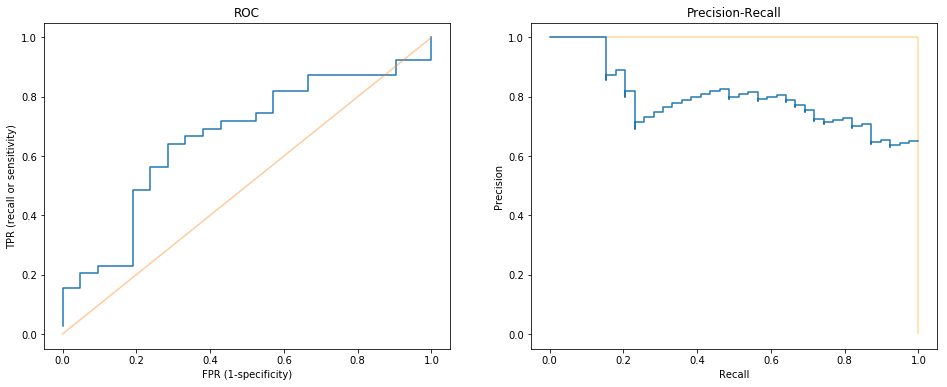

In [229]:
from sklearn.svm import SVC
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import KFold, GridSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=33)
scoring = make_scorer(performance_metric,which='f1')
svc =SVC(probability=True)
svc_params = {}

svc.fit(X_traindl, y_train)

svcpredict = svc.predict(X_testdl)

printMetric(y_test, svcpredict)
printROC_PR(svc, X_testdl, y_test, svcpredict)

### Default untuned DecisionTreeClassifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

array([[ 5, 16],
       [ 3, 36]])

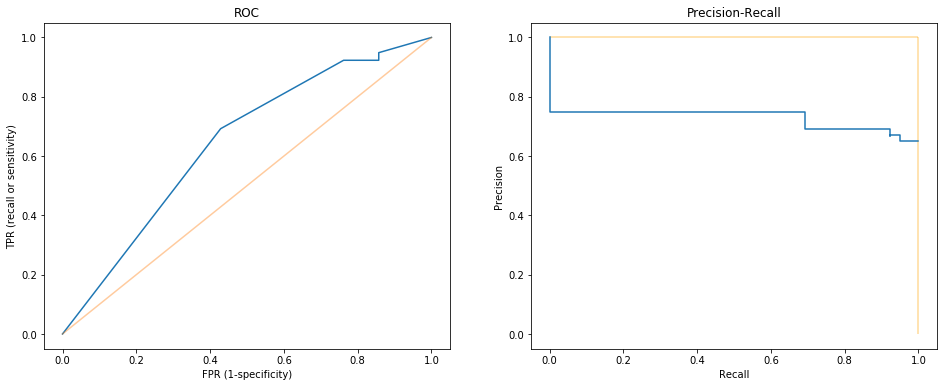

In [230]:
# Default decisiontree 
from sklearn.tree import DecisionTreeClassifier

dfdt = DecisionTreeClassifier(max_depth=5)
dfdt.fit(X_traindl, y_train)

dfdtpredict = dfdt.predict(X_testdl)
dfdtpredict_proba = dfdt.predict_proba(X_testdl)
printMetric(y_test, dfdtpredict)
printROC_PR(dfdt, X_testdl, y_test, dfdtpredict)

# Bagging classifiers

### DecisionTreeClassifier as base_estimator

In [231]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import KFold, GridSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=31)
scoring = make_scorer(performance_metric,which='f1')
dt = DecisionTreeClassifier(criterion='gini', random_state=7)
bc = BaggingClassifier(base_estimator=dt,  random_state=5) #n_estimators=50,
bcbe_params = {'n_estimators':[50], 
                'base_estimator__criterion':['gini','entropy'],
                'base_estimator__max_depth':range(3,8),
                'base_estimator__splitter':['best', 'random'],
                  'base_estimator__max_features':[4,5,6]}

clf = GridSearchCV(estimator=bc, cv=kf, param_grid=bcbe_params, scoring=scoring)

clf.fit(X_traindl, y_train)
clf.best_estimator_
display(HTML(('<b>best score</b> {}'.format(round(clf.best_score_,4)))))

GridSearchCV(cv=KFold(n_splits=5, random_state=31, shuffle=True),
       error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=5, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50], 'base_estimator__splitter': ['best', 'random'], 'base_estimator__max_depth': range(3, 8), 'base_estimator__max_features': [4, 5, 6], 'base_estimator__criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(performance_metric, which=f1), verbose=0)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=7, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=False,
         random_state=5, verbose=0, warm_start=False)

array([[ 8, 13],
       [ 1, 38]])

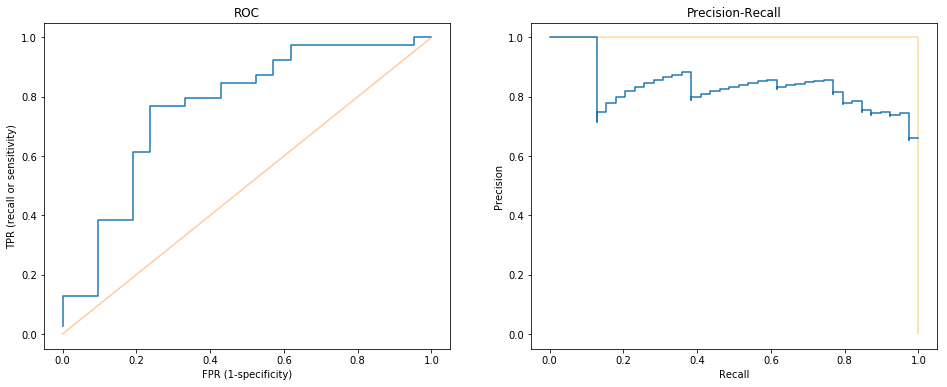

In [232]:
prediction = clf.predict(X_testdl)
printMetric(y_test, prediction)
printROC_PR(clf, X_testdl, y_test, prediction)

### RandomForest classifier ( also a bagged decision tree model)

In [233]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=6, shuffle=True, random_state=32)
scoring = make_scorer(performance_metric,which='f1')
rf = RandomForestClassifier(criterion='gini', random_state=6)
rf_params = {'n_estimators':[150],'max_depth':[9], 'max_features':[4],'min_samples_split':[2], 'min_samples_leaf':[5]}
rfclf = GridSearchCV(estimator=rf, cv=kf, param_grid=rf_params, scoring=scoring)

rfclf.fit(X_traindl, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=32, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=6, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [150], 'max_features': [4], 'max_depth': [9], 'min_samples_split': [2], 'min_samples_leaf': [5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(performance_metric, which=f1), verbose=0)

In [234]:
rfclf.best_estimator_
display(HTML(('<b>best score</b> {}'.format(round(rfclf.best_score_,4)))))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

array([[ 9, 12],
       [ 1, 38]])

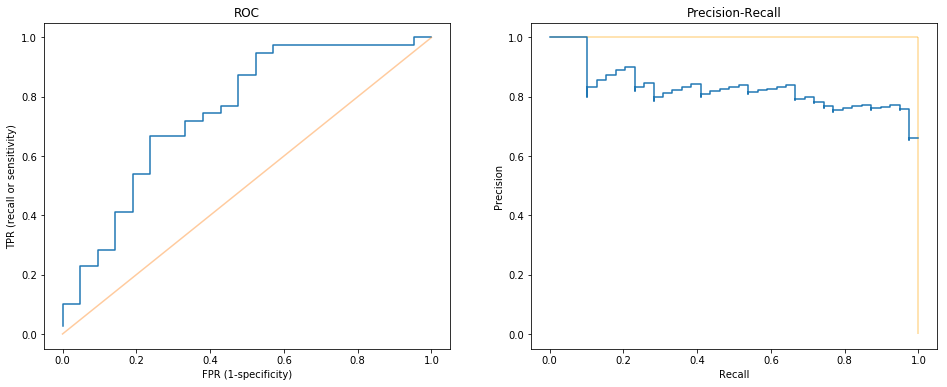

In [235]:
rfprediction = rfclf.predict(X_testdl)
printMetric(y_test, rfprediction)
printROC_PR(rfclf, X_testdl, y_test, rfprediction)

# Boosting ensemble

### GradientBoostingClassifier

In [236]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

kf = KFold(n_splits=6, shuffle=True, random_state=32)
scoring = make_scorer(performance_metric,which='f1')
gbclf = GradientBoostingClassifier(n_estimators=100,random_state=8)
gb_params = {'n_estimators':[100],'learning_rate':[0.035],'max_depth':range(3,4), 
             'max_features':[5],'min_samples_split':[2], 'min_samples_leaf':[8]}
gbclf = GridSearchCV(estimator=gbclf, cv=kf, param_grid=gb_params, scoring=scoring)

gbclf.fit(X_traindl, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=32, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=8, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'learning_rate': [0.035], 'max_features': [5], 'max_depth': range(3, 4), 'min_samples_split': [2], 'min_samples_leaf': [8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(performance_metric, which=f1), verbose=0)

In [237]:
gbclf.best_estimator_
display(HTML(('<b>best score</b> {}'.format(round(gbclf.best_score_,4)))))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.035, loss='deviance', max_depth=3,
              max_features=5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=8, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=8, subsample=1.0, verbose=0,
              warm_start=False)

array([[ 6, 15],
       [ 2, 37]])

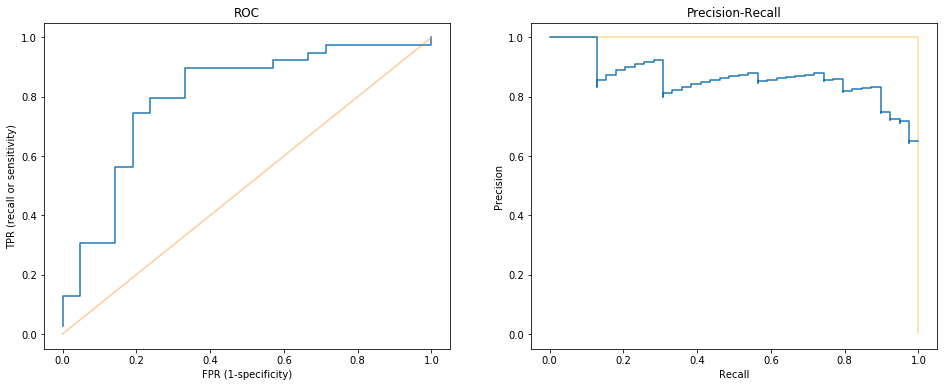

In [238]:
gbprediction = gbclf.predict(X_testdl)
printMetric(y_test, gbprediction)
printROC_PR(gbclf, X_testdl, y_test, gbprediction)

### XGBoost Classifier

In [239]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import KFold, GridSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=85)
auc_score = make_scorer(performance_metric,which='auc')
xg = XGBClassifier(random_state=23) #scale_pos_weight=1,
'''
http://xgboost.readthedocs.io/en/latest/python/python_api.html
(max_depth=3, learning_rate=0.01, n_estimators=149, silent=True, objective='binary:logistic', 
booster='gbtree', n_jobs=1, nthread=None, gamma=2.93, min_child_weight=5, max_delta_step=0, 
subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=2, 
base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)¶
'''

xg_params = {'n_estimators':[500],'learning_rate':[0.01],'max_depth':[3],
             'scale_pos_weight':[0.81], 'min_child_weight':[5], 'gamma':[1],
            'reg_alpha':[0.001],'reg_lambda':[1], 
             'booster':['gbtree'],'subsample':[1], 'colsample_bytree':[0.81],
            'max_delta_step':[0],'base_score':[0.48]}
# search = RandomizedSearchCV(estimator=xg, cv=kf, param_distributions=xg_params, n_iter = 150, scoring='roc_auc')
xgclf = GridSearchCV(estimator=xg, cv=kf, param_grid=xg_params, scoring='roc_auc', verbose=0)
testset = [(X_testdl, y_test)]
xgclf.fit(X_traindl, y_train, eval_metric='auc', eval_set=testset, verbose=True,early_stopping_rounds=20)


"\nhttp://xgboost.readthedocs.io/en/latest/python/python_api.html\n(max_depth=3, learning_rate=0.01, n_estimators=149, silent=True, objective='binary:logistic', \nbooster='gbtree', n_jobs=1, nthread=None, gamma=2.93, min_child_weight=5, max_delta_step=0, \nsubsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=2, \nbase_score=0.5, random_state=0, seed=None, missing=None, **kwargs)¶\n"

[0]	validation_0-auc:0.721612
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.757631
[2]	validation_0-auc:0.747863
[3]	validation_0-auc:0.746642
[4]	validation_0-auc:0.75641
[5]	validation_0-auc:0.747253
[6]	validation_0-auc:0.747253
[7]	validation_0-auc:0.760684
[8]	validation_0-auc:0.773504
[9]	validation_0-auc:0.777167
[10]	validation_0-auc:0.773504
[11]	validation_0-auc:0.774725
[12]	validation_0-auc:0.774725
[13]	validation_0-auc:0.774725
[14]	validation_0-auc:0.774725
[15]	validation_0-auc:0.775946
[16]	validation_0-auc:0.775946
[17]	validation_0-auc:0.786935
[18]	validation_0-auc:0.79243
[19]	validation_0-auc:0.797314
[20]	validation_0-auc:0.794872
[21]	validation_0-auc:0.796093
[22]	validation_0-auc:0.788767
[23]	validation_0-auc:0.791819
[24]	validation_0-auc:0.794261
[25]	validation_0-auc:0.794261
[26]	validation_0-auc:0.797924
[27]	validation_0-auc:0.791819
[28]	validation_0-auc:0.800366
[29]	validation_0-auc:0.800366
[30]	validation_0-

[50]	validation_0-auc:0.791209
[51]	validation_0-auc:0.791209
[52]	validation_0-auc:0.789988
[53]	validation_0-auc:0.785104
[54]	validation_0-auc:0.785104
[55]	validation_0-auc:0.786935
[56]	validation_0-auc:0.786935
Stopping. Best iteration:
[36]	validation_0-auc:0.79243

[0]	validation_0-auc:0.740537
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.75641
[2]	validation_0-auc:0.761294
[3]	validation_0-auc:0.761294
[4]	validation_0-auc:0.761294
[5]	validation_0-auc:0.761294
[6]	validation_0-auc:0.761294
[7]	validation_0-auc:0.785104
[8]	validation_0-auc:0.796703
[9]	validation_0-auc:0.801587
[10]	validation_0-auc:0.796703
[11]	validation_0-auc:0.794261
[12]	validation_0-auc:0.79243
[13]	validation_0-auc:0.791209
[14]	validation_0-auc:0.791209
[15]	validation_0-auc:0.789988
[16]	validation_0-auc:0.789988
[17]	validation_0-auc:0.789988
[18]	validation_0-auc:0.791209
[19]	validation_0-auc:0.791209
[20]	validation_0-auc:0.788767
[21]	validation_0-auc:0

GridSearchCV(cv=KFold(n_splits=5, random_state=85, shuffle=True),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=23, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500], 'subsample': [1], 'reg_alpha': [0.001], 'max_depth': [3], 'scale_pos_weight': [0.81], 'max_delta_step': [0], 'booster': ['gbtree'], 'gamma': [1], 'colsample_bytree': [0.81], 'learning_rate': [0.01], 'reg_lambda': [1], 'min_child_weight': [5], 'base_score': [0.48]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [240]:
xgclf.best_estimator_
display(HTML(('<b>best score</b> {}'.format(round(xgclf.best_score_,4)))))
display(xgclf.grid_scores_)

XGBClassifier(base_score=0.48, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.81, gamma=1, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=23, reg_alpha=0.001,
       reg_lambda=1, scale_pos_weight=0.81, seed=None, silent=True,
       subsample=1)

/usr/local/anaconda3/envs/udaciouspy36/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.69768, std: 0.06281, params: {'n_estimators': 500, 'subsample': 1, 'reg_alpha': 0.001, 'max_depth': 3, 'booster': 'gbtree', 'max_delta_step': 0, 'gamma': 1, 'colsample_bytree': 0.81, 'learning_rate': 0.01, 'reg_lambda': 1, 'min_child_weight': 5, 'scale_pos_weight': 0.81, 'base_score': 0.48}]

array([[ 8, 13],
       [ 2, 37]])

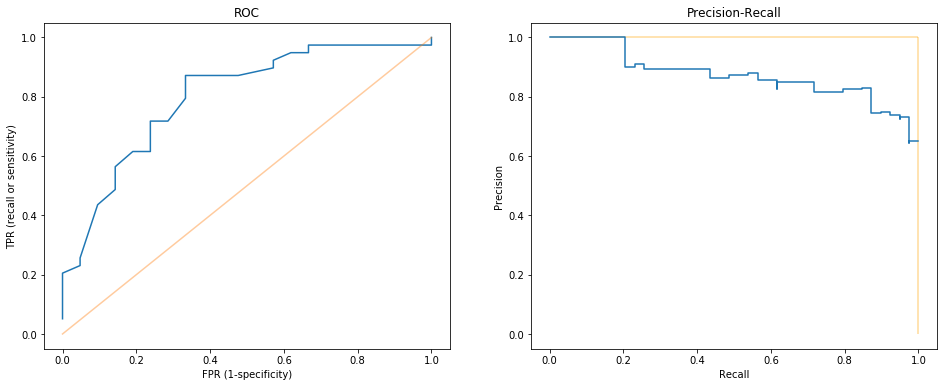

In [241]:
xgprediction = xgclf.predict(X_testdl)
printMetric(y_test, xgprediction)
printROC_PR(xgclf, X_testdl, y_test, xgprediction)

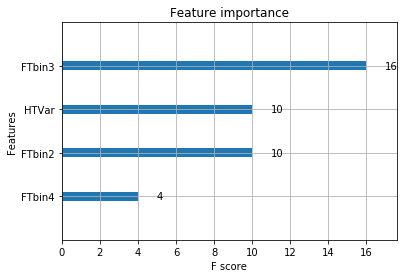

In [242]:
# Glimpse of feature importance
import xgboost
xgdmat = xgboost.DMatrix(X_traindl, y_train)
xgparams = {'n_estimators':200,'learning_rate':0.01,'max_depth':3,
             'scale_pos_weight':2, 'min_child_weight':5, 'gamma':1,
            'reg_alpha':0.001,'reg_lambda':1, 
             'booster':'gbtree','subsample':1, 'colsample_bytree':1,
            'max_delta_step':0}
fxgclf = xgboost.train(xgparams, xgdmat)
from xgboost import plot_importance
plot_importance(fxgclf)

# Voting ensemble

VotingClassifier(estimators=[('rf', GridSearchCV(cv=KFold(n_splits=6, random_state=32, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity...e_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[5, 3, 3])

array([[ 9, 12],
       [ 1, 38]])

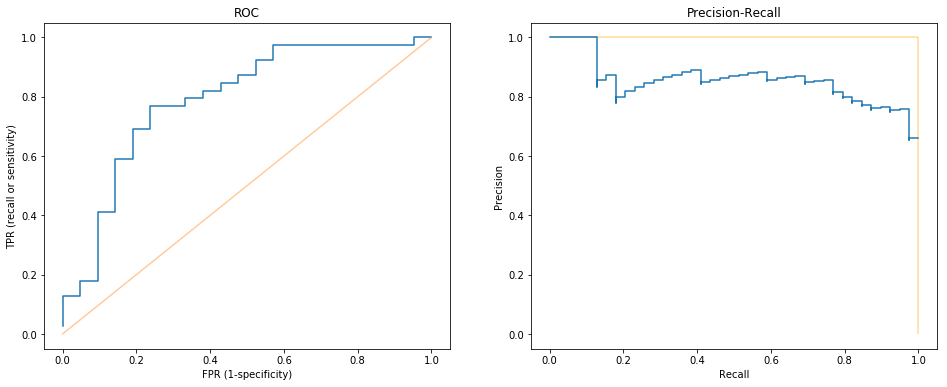

In [252]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

v1 = rfclf # RandomForest
v2 = clf # Bagging DecisionTree Classifier
v3 = xgclf # XGBClassifier

vclf = VotingClassifier(estimators=[('rf',v1),('b_dt',v2),('xgb',v3)],
                       voting='soft', weights=[5,3,3])
vclf.fit(X_traindl, y_train)

vprediction = vclf.predict(X_testdl)
printMetric(y_test, vprediction)
printROC_PR(vclf, X_testdl, y_test, vprediction)